# STEP 6: Calculate zonal statistics

In order to evaluate the connection between vegetation health and
redlining, we need to summarize NDVI across the same geographic areas as
we have redlining information.

First, import variables from previous notebooks:

In [1]:
store -r denver_redlining_gdf ndvi_da 

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>Some packages are included that will help you calculate statistics
for areas imported below. Add packages for:</p>
<ol type="1">
<li>Interactive plotting of tabular and vector data</li>
<li>Working with categorical data in <code>DataFrame</code>s</li>
</ol></div></div>

In [3]:
import hvplot.pandas # Interactive plots with pandas
import pandas as pd# Ordered categorical data
import matplotlib.pyplot as plt # Make subplots
import regionmask # Convert shapefile to mask
from xrspatial import zonal_stats # Calculate zonal statistics
import geopandas as gpd # Work with vector data


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert vector to raster</div></div><div class="callout-body-container callout-body"><p>You can convert your vector data to a raster mask using the
<code>regionmask</code> package. You will need to give
<code>regionmask</code> the geographic coordinates of the grid you are
using for this to work:</p>
<ol type="1">
<li>Replace <code>gdf</code> with your redlining
<code>GeoDataFrame</code>.</li>
<li>Add code to put your <code>GeoDataFrame</code> in the same CRS as
your raster data.</li>
<li>Replace <code>x_coord</code> and <code>y_coord</code> with the x and
y coordinates from your raster data.</li>
</ol></div></div>

In [4]:
help(regionmask.mask_geopandas)

Help on function mask_geopandas in module regionmask.core._geopandas:

mask_geopandas(geodataframe, lon_or_obj, lat=None, *, lon_name=None, lat_name=None, numbers=None, method=None, wrap_lon=None, use_cf=None, overlap=None)
    create a 2D float mask of a set of regions for the given lat/ lon grid
    
    Parameters
    ----------
    geodataframe : GeoDataFrame or GeoSeries
        Object providing the region definitions (polygons).
    
    lon_or_obj : object or array_like
        Can either be a longitude array and then ``lat`` needs to be
        given. Or an object where the longitude and latitude can be
        retrieved from, either using cf_xarray or by the names "lon"
        and "lat". See also ``use_cf``.
    
    lat : array_like, optional
        If ``lon_or_obj`` is a longitude array, the latitude needs to be
        passed.
    
    numbers : str, optional
        Name of the column to use for numbering the regions.
        This column must not have duplicates. If None

In [5]:
display(ndvi_da)

<xarray.DataArray (y: 447, x: 504)> Size: 901kB
array([[0.52324545, 0.47569358, 0.5083199 , ..., 0.20935605, 0.24135742,
        0.47914842],
       [0.51418644, 0.42545062, 0.5068801 , ..., 0.31370607, 0.24319632,
        0.40542087],
       [0.4167376 , 0.36720416, 0.4432058 , ..., 0.30259502, 0.32855093,
        0.36595973],
       ...,
       [       nan,        nan,        nan, ..., 0.29963237, 0.5068059 ,
        0.6121718 ],
       [       nan,        nan,        nan, ..., 0.4846814 , 0.6785298 ,
        0.680658  ],
       [       nan,        nan,        nan, ..., 0.4926997 , 0.5226445 ,
        0.4853771 ]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 4kB 4.947e+05 4.947e+05 ... 5.097e+05 5.097e+05
  * y            (y) float64 4kB 4.4e+06 4.4e+06 4.4e+06 ... 4.387e+06 4.387e+06
    spatial_ref  int64 8B 0

In [6]:
dir(ndvi_da)

['T',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__'

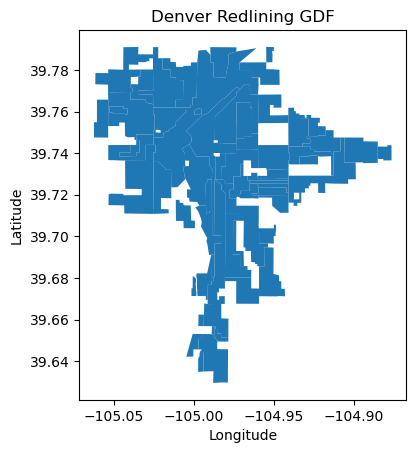

In [7]:
#Prep for redlining mask Part 1

#Plot redlining gdf to see what CRS it is projecting as
denver_redlining_gdf.plot(
    )
plt.gca().set(
    title='Denver Redlining GDF', 
    xlabel='Longitude',
    ylabel='Latitude',
)
plt.show()

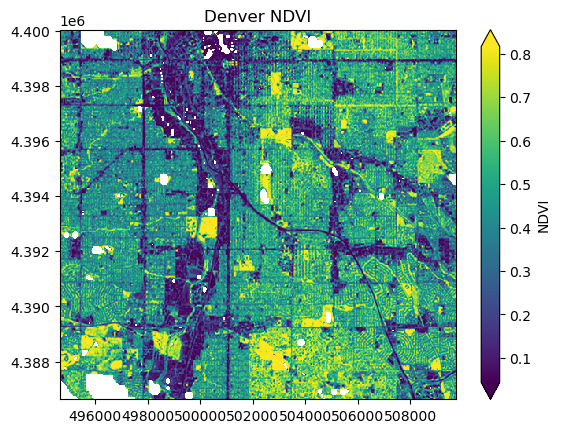

In [10]:
#Prep for redlining mask Part 2

#Plot the ndvi_da to see CRS
ndvi_da.plot(
    cbar_kwargs={"label": "NDVI"},
    robust=True
    )
plt.gca().set(
    title='Denver NDVI',
    xlabel='',
    ylabel='', 
)
plt.show()

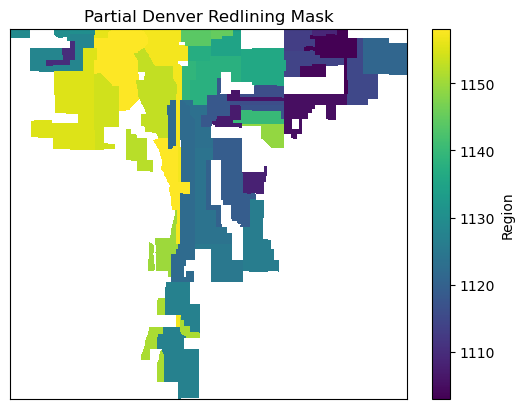

In [11]:
# Define new variable for denver redlining mask, using regionmask
denver_redlining_mask = regionmask.mask_geopandas(
    # Put gdf in same CRS as raster
    denver_redlining_gdf.to_crs(ndvi_da.rio.crs),
    # x and y coordinates from raster data x=504 y=447
    ndvi_da.x, ndvi_da.y,
    # The regions do not overlap
    overlap=False,
    # We're not using geographic coordinates
    wrap_lon=False,
)

# Plot the redlining mask 
denver_redlining_mask.plot(
    cbar_kwargs={"label": "Region"},
    )
plt.gca().set(
    title='Partial Denver Redlining Mask', 
    xlabel='',
    ylabel='',
    xticks=[], 
    yticks=[]
)
plt.show()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Calculate zonal statistics</div></div><div class="callout-body-container callout-body"><p>Calculate zonal status using the <code>zonal_stats()</code> function.
To figure out which arguments it needs, use either the
<code>help()</code> function in Python, or search the internet.</p></div></div>

In [12]:
help(zonal_stats)

Help on function stats in module xrspatial.zonal:

stats(zones: xarray.core.dataarray.DataArray, values: xarray.core.dataarray.DataArray, zone_ids: Optional[List[Union[int, float]]] = None, stats_funcs: Union[Dict, List] = ['mean', 'max', 'min', 'sum', 'std', 'var', 'count'], nodata_values: Union[int, float] = None, return_type: str = 'pandas.DataFrame') -> Union[pandas.core.frame.DataFrame, dask.dataframe.core.DataFrame, xarray.core.dataarray.DataArray]
    Calculate summary statistics for each zone defined by a `zones`
    dataset, based on `values` aggregate.
    
    A single output value is computed for every zone in the input `zones`
    dataset.
    
    This function currently supports numpy backed, and dask with numpy backed
    xarray DataArrays.
    
    Parameters
    ----------
    zones : xr.DataArray
        zones is a 2D xarray DataArray of numeric values.
        A zone is all the cells in a raster that have the same value,
        whether or not they are contiguous. T

In [14]:
# Calculate NDVI stats for each redlining zone
denver_ndvi_stats = zonal_stats(
    denver_redlining_mask,
    ndvi_da
)

# Call denver_ndvi_states to see the table
denver_ndvi_stats.head()

,zone,mean,max,min,sum,std,var,count
0,1103.0,0.594725,0.933680,0.051336,1084.184570,0.112025,0.012550,1823.0
1,1104.0,0.532335,0.751825,0.343143,264.038239,0.076069,0.005787,496.0
2,1105.0,0.551866,0.950300,0.034265,1221.831909,0.132201,0.017477,2214.0
3,1106.0,0.615817,0.880833,0.109626,289.433868,0.095491,0.009119,470.0
4,1107.0,0.578750,0.832567,0.069588,354.194824,0.116065,0.013471,612.0


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot regional statistics</div></div><div class="callout-body-container callout-body"><p>Plot the regional statistics:</p>
<ol type="1">
<li>Merge the NDVI values into the redlining
<code>GeoDataFrame</code>.</li>
<li>Use the code template below to convert the <code>grade</code> column
(<code>str</code> or <code>object</code> type) to an ordered
<code>pd.Categorical</code> type. This will let you use ordered color
maps with the grade data!</li>
<li>Drop all <code>NA</code> grade values.</li>
<li>Plot the NDVI and the redlining grade next to each other in linked
subplots.</li>
</ol></div></div>

In [15]:
# Merge the NDVI stats with redlining geometry into one `GeoDataFrame`
denver_redlining_ndvi_gdf = denver_redlining_gdf.merge(
    denver_ndvi_stats.set_index('zone'),
    left_index=True, right_index=True
)
# Change grade to ordered Categorical for plotting
denver_redlining_ndvi_gdf.grade = pd.Categorical(
    denver_redlining_ndvi_gdf.grade,
    ordered=True,
    categories=['A', 'B', 'C', 'D']
)

# Drop rows with NA grades
denver_redlining_ndvi_gdf = denver_redlining_ndvi_gdf.dropna()

print(denver_redlining_ndvi_gdf)

# Plot NDVI and redlining grade in linked subplots
(
    denver_redlining_ndvi_gdf.hvplot(
        c='mean',
        geo=True,
        xaxis='Longitude', 
        yaxis='Latitude',
        title='Denver Mean NDVI',
        clabel='Mean NDVI',
        cmap='Greens'
    )
    +
    denver_redlining_ndvi_gdf.hvplot(
        c='grade',
        geo=True,
        xaxis='Longitude', 
        yaxis='Latitude',
        title='Denver Redlining Grades',
        cmap='cet_diverging_bwr_20_95_c54'

    )

)

        area_id    city state  city_surve              category grade label  \
1103.0     6525  Denver    CO        True                  Best     A    A1   
1104.0     6529  Denver    CO        True                  Best     A    A2   
1105.0     6537  Denver    CO        True                  Best     A    A3   
1106.0     6536  Denver    CO        True                  Best     A    A4   
1107.0     6540  Denver    CO        True                  Best     A    A5   
1108.0     6550  Denver    CO        True                  Best     A    A6   
1109.0     6526  Denver    CO        True       Still Desirable     B    B1   
1110.0     6562  Denver    CO        True       Still Desirable     B   B10   
1113.0     6527  Denver    CO        True       Still Desirable     B    B2   
1114.0     6528  Denver    CO        True       Still Desirable     B    B3   
1115.0     6524  Denver    CO        True       Still Desirable     B    B4   
1116.0     6535  Denver    CO        True       Stil

:Layout
   .Polygons.I  :Polygons   [Longitude,Latitude]   (mean)
   .Polygons.II :Polygons   [Longitude,Latitude]   (grade)

In [16]:
# Store the denver_redlining_ndvi_gdf for the next notebook
%store denver_redlining_ndvi_gdf

Stored 'denver_redlining_ndvi_gdf' (GeoDataFrame)
